## Part 1 - Data Preprocessing

### Importing the libraries

In [12]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Importing modelling libraries
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.neural_network import MLPClassifier

### Importing dataset


In [13]:
dataset = pd.read_csv("C:/Users/saisu/Downloads/Churn_Modelling (2).csv")

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [15]:
dataset.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
dataset['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [17]:
dataset['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [18]:
dataset['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [19]:
dataset['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [20]:
dataset['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [21]:
dataset['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [22]:
dataset.groupby('IsActiveMember')['Exited'].value_counts()

IsActiveMember  Exited
0               0         3547
                1         1302
1               0         4416
                1          735
Name: Exited, dtype: int64

In [23]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [24]:
x = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [25]:
print(x)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [26]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:, 2] = le.fit_transform(x[:, 2])

In [28]:
print(x)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [30]:
print (x)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into the Training set and Test set

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

### Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Artificial Neural Network

## Part 2 - Building the ANN

### Initializing the ANN

In [33]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [34]:
# 'relu' - codename for rectifier activation function.
ann.add(tf.keras.layers.Dense(units=6, activation='relu')) 

### Adding the second hidden layer

In [35]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu')) 

### Adding the output layer

In [36]:
# We need a sigmoid activation function, because it will give the predictions, as well as the probabilities.
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) 


## Part 3 - Training the ANN

### Compiling the ANN

In [37]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Training the ANN on the Training set

In [38]:
ann.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5612 - accuracy: 0.7405
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4589 - accuracy: 0.8064
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4332 - accuracy: 0.8116
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4209 - accuracy: 0.8181
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4130 - accuracy: 0.8195
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4071 - accuracy: 0.8220
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4017 - accuracy: 0.8253
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3966 - accuracy: 0.8264
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3921 - accuracy: 0.8282
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3880 - accura

250/250 [==============================] - 1s 2ms/step - loss: 0.3312 - accuracy: 0.8615
Epoch 81/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3308 - accuracy: 0.8600
Epoch 82/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3315 - accuracy: 0.8629
Epoch 83/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3303 - accuracy: 0.8626
Epoch 84/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3306 - accuracy: 0.8631
Epoch 85/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3305 - accuracy: 0.8635
Epoch 86/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3307 - accuracy: 0.8630
Epoch 87/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3301 - accuracy: 0.8625
Epoch 88/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3302 - accuracy: 0.8624
Epoch 89/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3306 - accuracy: 

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

Using the below info we are seeing weather customer stays or exist bank. 

Geography: France

Credit Score: 620

Gender: Male

Age: 35 years old

Tenure: 3 years

Balance:  65000

Number of Products: 3

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary:  55000

**Solution**

In [39]:
print(ann.predict(sc.transform([[1, 0, 0, 620, 1, 35, 3, 65000, 3, 1, 1, 55000]])))

[[0.6464071]]


Therefore, our ANN model predicts that this customer stays in the bank!

### Predicting the Test set results

In [40]:
y_predicted = ann.predict(X_test)
print(y_predicted)
y_predicted = (y_predicted > 0.5)
print(np.concatenate((y_predicted.reshape(len(y_predicted),1), y_test.reshape(len(y_test),1)),1))

[[0.04186752]
 [0.0917933 ]
 [0.07056576]
 ...
 [0.00569516]
 [0.05730519]
 [0.49855304]]
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predicted)
print(cm)
print('The accuracy of ANN is:')
accuracy_score(y_test, y_predicted)

[[1521   64]
 [ 205  210]]
The accuracy of ANN is:


0.8655

Total correct predictions that customers stay in bank = A11

Total correct predictions that customers leave the bank = A12

Total incorrect predictions that customers stay in the bank = A21

Total incorrect predictions that customers leave in the bank = A22

#  For Random Forest

### Predicting The Accuracy

In [42]:
rf = rf = RandomForestClassifier(random_state=1,n_jobs=-1,criterion='entropy')
rf_tuned = rf.fit(X_train,y_train)
y_pred = rf_tuned.predict(X_test) 
acc_rf = round(accuracy_score(y_pred, y_test) * 100, 2) 
print('The Accuracy of Random Forest is:')
print(acc_rf)

The Accuracy of Random Forest is:
86.2


In [43]:
r=1
models = [LogisticRegression(random_state=r),GaussianNB(), KNeighborsClassifier(),
          DecisionTreeClassifier(random_state=r),
            MLPClassifier(random_state=r)]
names = ["LogisticRegression","GaussianNB","KNN",
             "DecisionTree","Art Neural_Network"]


In [44]:
print('Default model validation accuracies for the train data:', end = "\n\n")
for name, model in zip(names, models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name,':',"%.2f" %(accuracy_score(y_pred, y_test)*100),"% accuracy")

Default model validation accuracies for the train data:

LogisticRegression : 81.25 % accuracy
GaussianNB : 82.60 % accuracy
KNN : 82.55 % accuracy
DecisionTree : 79.95 % accuracy
Art Neural_Network : 86.25 % accuracy


In [45]:
print(y_pred)

[0 0 0 ... 0 0 1]


In [46]:
predictions = y_pred

In [47]:
output = pd.DataFrame({ 'Exited': predictions }) 
output.to_csv('submission.csv', index=False)
output.head()

,Exited
0,0
1,0
2,0
3,0
4,0


In [48]:
output.describe().T

,count,mean,std,min,25%,50%,75%,max
Exited,2000.0,0.146,0.353195,0.0,0.0,0.0,0.0,1.0


In [49]:
output["Exited"].value_counts()

0    1708
1     292
Name: Exited, dtype: int64

In [50]:
Retention_Rate = 1691/2000*100

In [51]:
print(str(Retention_Rate)+'%')

84.55%


### Correlations between numerical features of Data

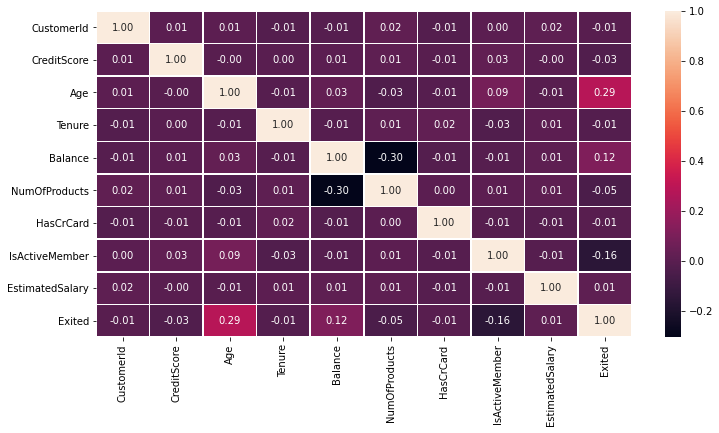

In [52]:
#Let's visualize the correlations between numerical features of data.
fig, ax = plt.subplots(figsize=(12,6)) 
sns.heatmap(dataset.iloc[:,1:len(dataset)].corr(), annot = True, fmt = ".2f", linewidths=0.5, ax=ax) 
plt.show()

In [53]:
dataset.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
